Day 1: Average Leaf Count = 1.5
Day 2: Average Leaf Count = 1.0
Day 3: Average Leaf Count = 1.0
Day 4: Average Leaf Count = 1.5
Day 5: Average Leaf Count = 1.5
Day 6: Average Leaf Count = 5.0
Day 7: Average Leaf Count = 2.0
Day 8: Average Leaf Count = 7.0


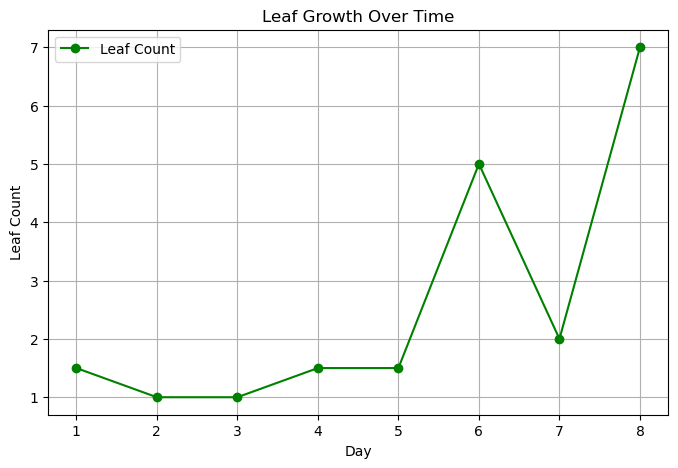

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_leaves(image_path, min_contour_area=50):#function for count leaves
    # Load image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Could not load image from path: {image_path}")
        return None  # Exit if image is not loaded correctly

    # Resize the image to a fixed size for consistency
    image = cv2.resize(image, (600, 600))  
    
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define green color range
    lower_green = np.array([25, 55, 65])  
    upper_green = np.array([95, 255, 255])  
    
    # Create mask for green areas
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Define a kernel for erosion and apply it
    kernel = np.ones((3, 3), np.uint8)
    eroded_mask = cv2.erode(mask, kernel, iterations=3)

    # Apply morphological operations
    eroded_mask = cv2.morphologyEx(eroded_mask, cv2.MORPH_CLOSE, kernel)
    eroded_mask = cv2.morphologyEx(eroded_mask, cv2.MORPH_OPEN, kernel)

    # Find contours in the mask
    contours, _ = cv2.findContours(eroded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on minimum area
    valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    leaf_count = len(valid_contours)

    return leaf_count  # Return the leaf count

# **Step 2: Store the Leaf Counts for Graph**
days = []
leaf_counts = []

# Loop through images for 10 days
for i in range(1, 9):
    image_path_am = f'overlaid images/morning/day {i}.jpg'
    leaf_count_am = count_leaves(image_path_am, min_contour_area=10)

    image_path_pm =f'overlaid images/evening/day {i}.jpg'
    leaf_count_pm = count_leaves(image_path_pm, min_contour_area=10)

    # Take the average leaf count of AM & PM if both exist
    if leaf_count_am is not None and leaf_count_pm is not None:
        leaf_count = (leaf_count_am + leaf_count_pm) / 2
    elif leaf_count_am is not None:
        leaf_count = leaf_count_am
    elif leaf_count_pm is not None:
        leaf_count = leaf_count_pm
    else:
        leaf_count = None  # No data available for this day

    if leaf_count is not None:
        days.append(i)
        leaf_counts.append(leaf_count)
        print(f"Day {i}: Average Leaf Count = {leaf_count}")

#Plot the Graph
plt.figure(figsize=(8, 5))
plt.plot(days, leaf_counts, marker='o', linestyle='-', color='g', label='Leaf Count')

plt.xlabel("Day")
plt.ylabel("Leaf Count")
plt.title("Leaf Growth Over Time")
plt.legend()
plt.grid(True)

# Save or display the graph
plt.savefig("leaf_growth_graph.png")  # Saves the graph as an image
plt.show()